1.搭建神经网络，使用olivettiface数据集进行训练  
2.结合归一化和正则化来优化网络模型结构，观察对比loss结果  
3.尝试不同optimizer对模型进行训练，观察对比loss结果  
4.注册kaggle并尝试激活Accelerator，使用GPU进行训练

In [21]:
from sklearn.datasets import fetch_olivetti_faces
olivetti_faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_faces.keys())
print(olivetti_faces.data.shape)
print(olivetti_faces.images.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.DESCR)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)
(400, 64, 64)
(400,)
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set C

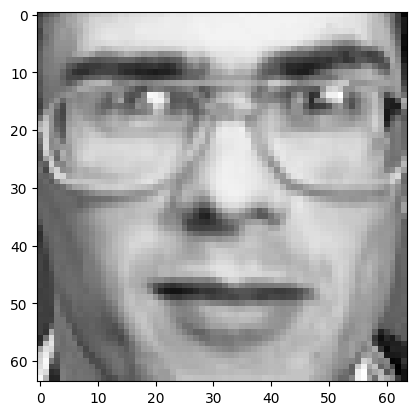

In [22]:
import matplotlib.pyplot as plt
face = olivetti_faces.images[3]
plt.imshow(face, cmap='gray')
plt.show()

In [23]:
import torch
import torch.nn as nn
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)
dataset = [(img, lbl) for img, lbl in zip(images, targets)]
dataloder = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [24]:
import torch_directml
device = torch_directml.device() if torch_directml.is_available else torch.device('cpu')
device

device(type='privateuseone', index=0)

In [25]:
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.ReLU(),
    nn.Linear(8192, 4096),
    nn.ReLU(),
    nn.Linear(4096, 2048),
    nn.ReLU(),
    nn.Linear(2048,40)
).to(device)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
loss_hist = []
for i in range(10):
    for img, lbl in dataloder:
        img = img.to(device)
        lbl = lbl.to(device)
        result = model(img)
        loss = criterion(result, lbl.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist.append(loss.item())
        print(f'epoch:{i + 1} loss:{loss.item():.4f}')

epoch:1 loss:3.6999
epoch:1 loss:15.9357
epoch:1 loss:5.2302
epoch:1 loss:3.7834
epoch:1 loss:3.9408
epoch:1 loss:3.8389
epoch:1 loss:4.0119
epoch:1 loss:3.8455
epoch:1 loss:3.7882
epoch:1 loss:3.7817
epoch:1 loss:3.6866
epoch:1 loss:3.7583
epoch:1 loss:3.7618
epoch:1 loss:3.6525
epoch:1 loss:3.6278
epoch:1 loss:3.8048
epoch:1 loss:3.6786
epoch:1 loss:3.7739
epoch:1 loss:3.7438
epoch:1 loss:3.6783
epoch:1 loss:3.6995
epoch:1 loss:3.7472
epoch:1 loss:3.6958
epoch:1 loss:3.7594
epoch:1 loss:3.7402
epoch:1 loss:3.6943
epoch:1 loss:3.6787
epoch:1 loss:3.7265
epoch:1 loss:3.7270
epoch:1 loss:3.6889
epoch:1 loss:3.7270
epoch:1 loss:3.6875
epoch:1 loss:3.6951
epoch:1 loss:3.6985
epoch:1 loss:3.6803
epoch:1 loss:3.6888
epoch:1 loss:3.6798
epoch:1 loss:3.7585
epoch:1 loss:3.7123
epoch:1 loss:3.6941
epoch:2 loss:3.6751
epoch:2 loss:3.7091
epoch:2 loss:3.7488
epoch:2 loss:3.6974
epoch:2 loss:3.6896
epoch:2 loss:3.6940
epoch:2 loss:3.7036
epoch:2 loss:3.6901
epoch:2 loss:3.6843
epoch:2 loss:3.6914

# 结合归一化和正则化来优化网络模型结构，观察对比loss结果

In [33]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_face = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_face.keys())
print(olivetti_face.data.shape)
print(olivetti_face.target.shape)
print(olivetti_face.images.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)
(400,)
(400, 64, 64)


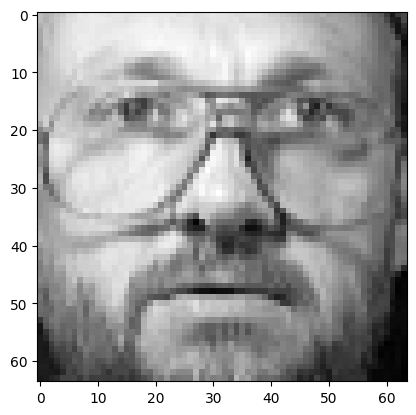

In [34]:
import matplotlib.pyplot as plt

face = olivetti_face.images[0]
plt.imshow(face, cmap='gray')
plt.show()

In [48]:
import torch 
import torch_directml
import torch.nn as nn
images = torch.tensor(olivetti_face.data)
targets = torch.tensor(olivetti_face.target)
datasets = [(img, lbl) for img, lbl in zip(images, targets)]
dataloder = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)
device = torch_directml.device() if torch_directml.is_available() else torch.device("cpu")
print(device)
device = torch.device("cpu")

privateuseone:0


In [53]:
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(8192, 16384),
    nn.BatchNorm1d(16384),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(16384, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024, 40),
).to(device)

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [55]:
loss_hist = []
for i in range(10):
    for img, lbl in dataloder:
        img = img.to(device)
        lbl = lbl.to(device)
        result = model(img)
        loss = criterion(result, lbl)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist.append(loss.item())
        print(f"Epoch: {i}, Loss: {loss.item()}")

Epoch: 0, Loss: 4.005241394042969
Epoch: 0, Loss: 3.9117703437805176
Epoch: 0, Loss: 3.287623643875122
Epoch: 0, Loss: 4.331934928894043
Epoch: 0, Loss: 3.6682887077331543
Epoch: 0, Loss: 3.8773484230041504
Epoch: 0, Loss: 3.9669852256774902
Epoch: 0, Loss: 2.3054399490356445
Epoch: 0, Loss: 3.3008170127868652
Epoch: 0, Loss: 4.346062660217285
Epoch: 0, Loss: 3.668705701828003
Epoch: 0, Loss: 4.271341323852539
Epoch: 0, Loss: 3.219128131866455
Epoch: 0, Loss: 4.041085243225098
Epoch: 0, Loss: 4.160410404205322
Epoch: 0, Loss: 3.5211682319641113
Epoch: 0, Loss: 3.2544331550598145
Epoch: 0, Loss: 3.5983681678771973
Epoch: 0, Loss: 2.7387962341308594
Epoch: 0, Loss: 3.296081066131592
Epoch: 0, Loss: 4.340537071228027
Epoch: 0, Loss: 3.9419922828674316
Epoch: 0, Loss: 3.6893506050109863
Epoch: 0, Loss: 2.8445537090301514
Epoch: 0, Loss: 3.1203513145446777
Epoch: 0, Loss: 3.7225894927978516
Epoch: 0, Loss: 3.789494276046753
Epoch: 0, Loss: 2.8250670433044434
Epoch: 0, Loss: 2.85543203353881

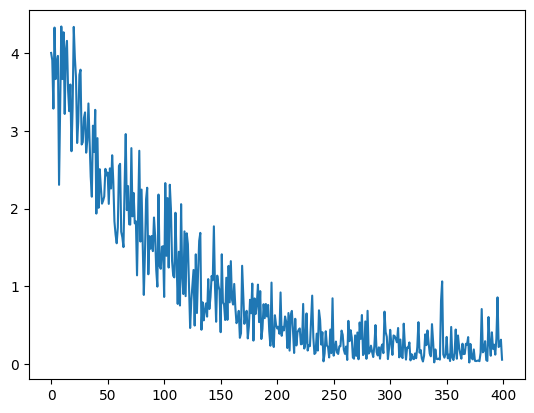

In [56]:
plt.plot(range(len(loss_hist)), loss_hist)
plt.show()